In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts

In [22]:
# Loading the testdata
data = pd.read_csv('testdata.csv')
x = np.mat(data.iloc[:, 0:1].values)
y = np.mat(data.iloc[:, 1:].values)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [66]:
class ClassificationModel():
    def siggy(z):
        return 1/(1+np.e**-z)
        
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])
        
        self.f = 1/(1 + np.e**-(tf.matmul(self.x, self.W) + self.b))
        
        self.loss = tf.losses.sigmoid_cross_entropy(self.y, self.f)

In [151]:
model = ClassificationModel()
mini_op = tf.train.GradientDescentOptimizer(100).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

for i in range(10000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})
    
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_test, model.y: y_test})
print('Loss: %.2f' % loss)
print('W: %.2f\nb: %.2f' % (W, b))

Loss: 0.50
W: -22.45
b: 10.72


In [152]:
# Predicting results from testdata and printing accuracy
temp_preds = session.run([model.f], {model.x: x_test, model.y: y_test})

# Compares observations and predictions (add .5 to observation to get int 0 or 1)
predictions = [int(i) for i in temp_preds[0]+0.5]
ys = y_test

number_correct = sum([int(predictions[x] == ys[x]) for x in range(len(ys))])

print(str(number_correct/len(ys)*100) + '% correct')

100.0% correct


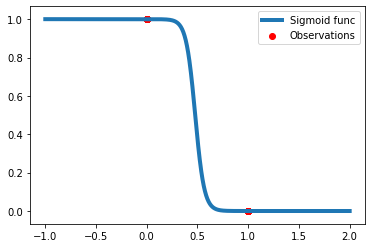

In [153]:
# Plotting the result
def siggy(z):
    return 1/(1 + np.e**-z)

X = np.linspace(-1, 2, 1000)
Y = session.run([model.f], {model.x: [[x] for x in X], model.y: [[x] for x in X]})

plt.plot(X, [y[0] for y in Y[0]], linewidth=4, label='Sigmoid func')
plt.scatter([x[0] for x in x_test], [y[0] for y in y_test], c='red', label='Observations')
plt.legend()
plt.show()